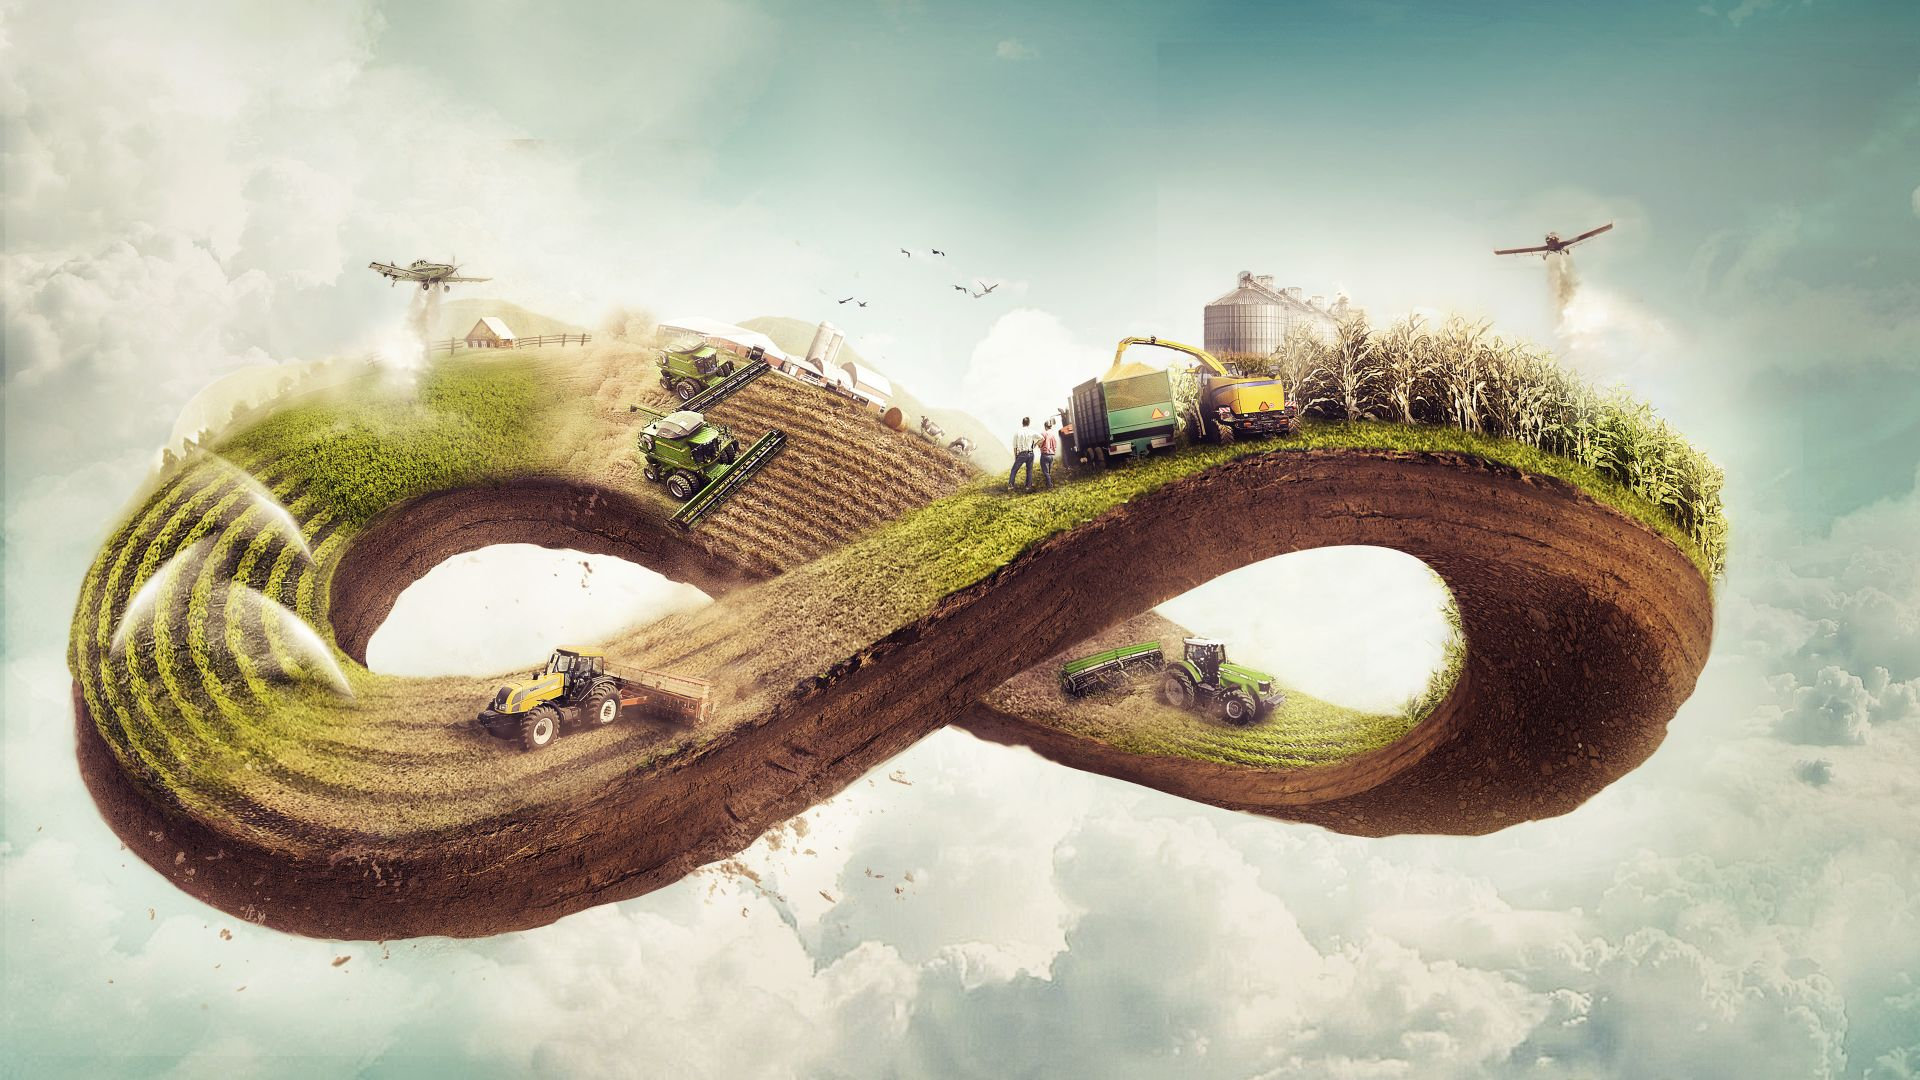

# AGRICULTURE CROP PLANTS HEALTHY GROWTH PREDICTION

In [445]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [446]:
train=pd.read_excel('train_agriculture.xlsx')
train

ID  Estimated_Insects_Count  Crop_Type  Soil_Type  \
0     F00000001                      188          1          0   
1     F00000003                      209          1          0   
2     F00000004                      257          1          0   
3     F00000005                      257          1          1   
4     F00000006                      342          1          0   
...         ...                      ...        ...        ...   
4594  F00008078                     2138          0          1   
4595  F00008079                     2139          0          1   
4596  F00008080                     2267          0          1   
4597  F00008082                     2267          0          1   
4598  F00008083                     2267          0          1   

      Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
0                          1                  0                0.0   
1                          1                  0                0.0   
2                          1                  0                0.0   
3                          1                  0                0.0   
4                          1                  0                0.0   
...                      ...                ...                ...   
4594                       2                 20                NaN   
4595                       2                 30               47.0   
4596                       2                 10                7.0   
4597                       2                 10               20.0   
4598                       2                 10               33.0   

      Number_Weeks_Quit  Season  Crop_Damage  
0                     0       1            0  
1                     0       2            1  
2                     0       2            1  
3                     0       2            1  
4                     0       2            1  
...                 ...     ...          ...  
4594                  1       1            1  
4595                  2       1            1  
4596                 27       2            0  
4597                 24       2            0  
4598                 17       2            0  

[4599 rows x 10 columns]

In [447]:
test=pd.read_excel('test_agriculture.xlsx')
test

ID  Estimated_Insects_Count  Crop_Type  Soil_Type  \
0     F00000002                      188          1          1   
1     F00000007                      410          1          1   
2     F00000011                      626          1          0   
3     F00000013                      731          1          0   
4     F00000014                      789          0          0   
...         ...                      ...        ...        ...   
1194  F00003133                     1132          0          1   
1195  F00003135                     1132          0          1   
1196  F00003138                     1132          0          1   
1197  F00003149                     1212          0          1   
1198  F00003150                     1212          0          1   

      Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
0                          1                  0                NaN   
1                          1                  0                0.0   
2                          1                  0                0.0   
3                          1                  0                0.0   
4                          1                  0                0.0   
...                      ...                ...                ...   
1194                       2                 40               34.0   
1195                       2                 40               25.0   
1196                       2                 20               13.0   
1197                       2                 10               35.0   
1198                       2                 15                NaN   

      Number_Weeks_Quit  Season  
0                     0       2  
1                     0       2  
2                     0       2  
3                     0       2  
4                     0       1  
...                 ...     ...  
1194                  7       3  
1195                  3       1  
1196                 23       1  
1197                  5       1  
1198                 20       3  

[1199 rows x 9 columns]

In [448]:
#see the info of train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [449]:
#for test data info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


In [450]:
#lets see shapes and visualise both
train.shape

(4599, 10)

In [451]:
test.shape

(1199, 9)

In [452]:
#checking missing value for train data
train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

as you see 442 missing values in number_weeks_used column

In [453]:
#check test data missing values
test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

in test data 119 missing values in number_weeks_used

In [454]:
train['Number_Weeks_Used'].unique()

array([ 0., nan, 26., 20., 15., 14., 19., 24.,  8., 23., 25., 28., 29.,
       22., 21., 17., 30., 35., 32., 27., 16., 31., 33., 34., 39., 38.,
       42., 40., 41., 36., 44., 37., 46., 45., 47., 43., 50., 10., 49.,
       53., 48., 51., 54., 52., 55., 56., 61., 18., 57., 62., 60., 63.,
       66., 59., 64., 13.,  7.,  5., 12.,  6.,  9., 58., 11., 65.])

In [455]:
#we can take mode values and replace in missing values
train['Number_Weeks_Used'].mean()

28.89102718306471

In [456]:
#lets do same thing to test data
test['Number_Weeks_Used'].mean()

29.033333333333335

In [457]:
#replace nan to mean values
train['Number_Weeks_Used']=train['Number_Weeks_Used'].fillna(28.9)

In [458]:
train.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [459]:
#replace in test data
test['Number_Weeks_Used']=test['Number_Weeks_Used'].fillna(29.0)

In [460]:
test.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [461]:
train.describe()

Estimated_Insects_Count    Crop_Type    Soil_Type  \
count              4599.000000  4599.000000  4599.000000   
mean               1363.000435     0.224831     0.476625   
std                 814.439120     0.417517     0.499508   
min                 150.000000     0.000000     0.000000   
25%                 731.000000     0.000000     0.000000   
50%                1212.000000     0.000000     0.000000   
75%                1786.000000     0.000000     1.000000   
max                4097.000000     1.000000     1.000000   

       Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
count             4599.000000        4599.000000        4599.000000   
mean                 2.283540          26.477495          28.891890   
std                  0.471978          15.524647          11.965785   
min                  1.000000           0.000000           0.000000   
25%                  2.000000          15.000000          20.000000   
50%                  2.000000          20.000000          28.900000   
75%                  3.000000          40.000000          36.000000   
max                  3.000000          95.000000          66.000000   

       Number_Weeks_Quit       Season  Crop_Damage  
count        4599.000000  4599.000000  4599.000000  
mean            9.205479     1.894325     0.194390  
std             9.713253     0.694952     0.454597  
min             0.000000     1.000000     0.000000  
25%             0.000000     1.000000     0.000000  
50%             7.000000     2.000000     0.000000  
75%            16.000000     2.000000     0.000000  
max            47.000000     3.000000     2.000000

in train data mean and min has large difference in 75% and max larger difference in estimated insects count

In [462]:
test.describe()

Estimated_Insects_Count    Crop_Type    Soil_Type  \
count              1199.000000  1199.000000  1199.000000   
mean               1288.737281     0.194329     0.455379   
std                 845.004912     0.395848     0.498213   
min                 150.000000     0.000000     0.000000   
25%                 677.000000     0.000000     0.000000   
50%                1056.000000     0.000000     0.000000   
75%                1785.000000     0.000000     1.000000   
max                4097.000000     1.000000     1.000000   

       Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
count             1199.000000        1199.000000        1199.000000   
mean                 2.383653          26.555463          29.030025   
std                  0.522866          16.154101          12.130651   
min                  1.000000           0.000000           0.000000   
25%                  2.000000          15.000000          20.000000   
50%                  2.000000          20.000000          29.000000   
75%                  3.000000          40.000000          36.000000   
max                  3.000000          90.000000          64.000000   

       Number_Weeks_Quit       Season  
count        1199.000000  1199.000000  
mean            7.052544     1.881568  
std             8.863634     0.685640  
min             0.000000     1.000000  
25%             0.000000     1.000000  
50%             3.000000     2.000000  
75%            13.000000     2.000000  
max            42.000000     3.000000

in test data mean and min has larger difference in all columns and same has 75% and max

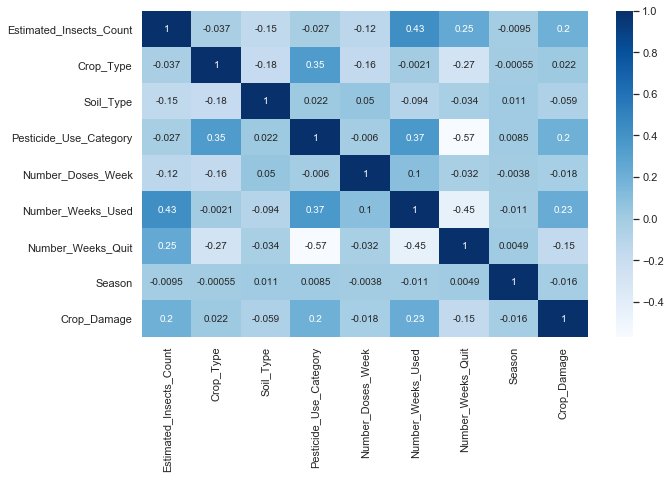

In [463]:
# check the correlation for train data
train_cor=train.corr()
plt.figure(figsize=(10,6))
sns.heatmap(train_cor,annot=True,cmap='Blues')
plt.show()

here darker color shows positive correlations where as light color shows negative correlation

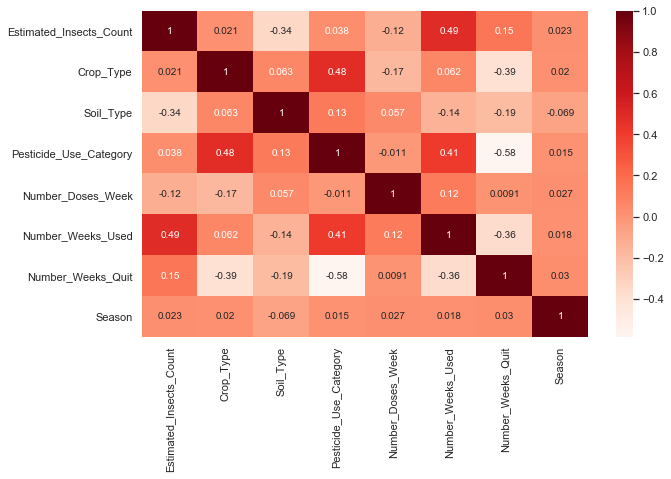

In [464]:
#for test data correlation
test_cor=test.corr()
plt.figure(figsize=(10,6))
sns.heatmap(test_cor,annot=True,cmap='Reds')
plt.show()

there is difference in correlation in train and test data  as you see in number weeks used to estimated insects counts in train data
correlation shows 0.43 where as in test data it shows 0.49 difference is 0.06

In [465]:
#visulaise the train data
train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [466]:
train.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

# DATA VISUALISATION OF TRAIN AND TEST DATA

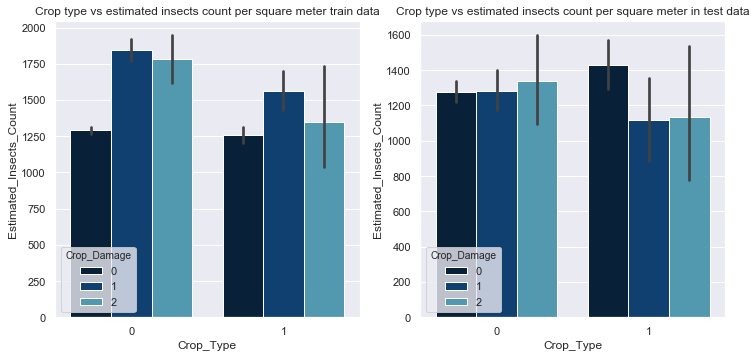

In [467]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
sns.barplot(x='Crop_Type',y='Estimated_Insects_Count',hue='Crop_Damage',data=train,palette='ocean')
sns.set(style='darkgrid')
plt.title('Crop type vs estimated insects count per square meter train data')

plt.subplot(grid_rows,grid_cols,2)
sns.barplot(x=test['Crop_Type'],y=test['Estimated_Insects_Count'],hue=train['Crop_Damage'],palette='ocean')
sns.set(style='darkgrid')
plt.title('Crop type vs estimated insects count per square meter in test data')

plt.show()

crop damage
0-alive
1-Damage due to other cause
2-Damage due to pesticides

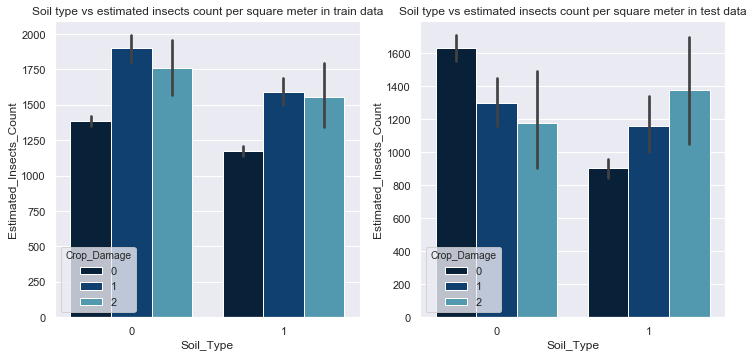

In [468]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
sns.barplot(x='Soil_Type',y='Estimated_Insects_Count',hue='Crop_Damage',data=train,palette='ocean')
sns.set(style='darkgrid')
plt.title('Soil type vs estimated insects count per square meter in train data')

plt.subplot(grid_rows,grid_cols,2)
sns.barplot(x=test['Soil_Type'],y=test['Estimated_Insects_Count'],hue=train['Crop_Damage'],palette='ocean')
sns.set(style='darkgrid')
plt.title('Soil type vs estimated insects count per square meter in test data')

plt.show()

crop damage
0-alive
1-Damage due to other cause
2-Damage due to pesticides

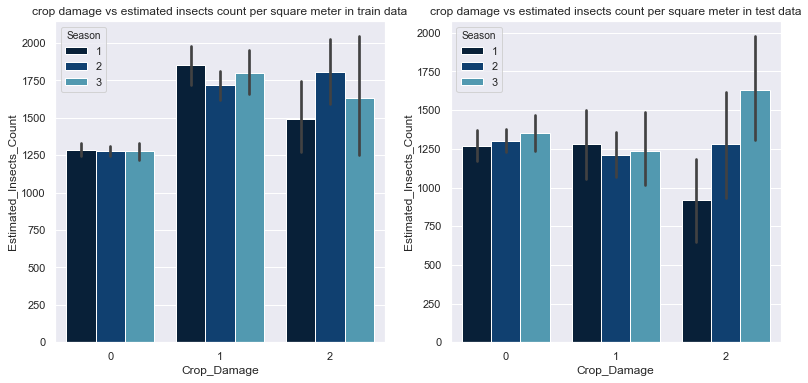

In [469]:
fig = plt.gcf()
fig.set_size_inches(13,13)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
sns.barplot(x='Crop_Damage',y='Estimated_Insects_Count',hue='Season',data=train,palette='ocean')
sns.set(style='darkgrid')
plt.title('crop damage vs estimated insects count per square meter in train data')

plt.subplot(grid_rows,grid_cols,2)
sns.barplot(x=train['Crop_Damage'],y=test['Estimated_Insects_Count'],hue=train['Season'],palette='ocean')
sns.set(style='darkgrid')
plt.title('crop damage vs estimated insects count per square meter in test data')
plt.show()

crop damage
0-alive
1-Damage due to other cause
2-Damage due to pesticides

Text(0.5, 1.0, 'Crop type vs pesticides use category in test data')

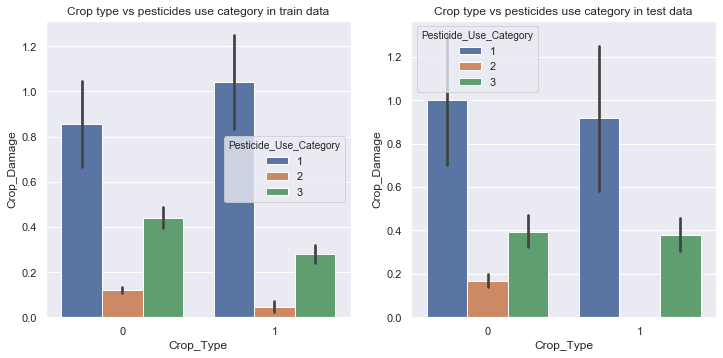

In [470]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
sns.barplot(x='Crop_Type',y='Crop_Damage',hue='Pesticide_Use_Category',data=train)
sns.set(style='darkgrid')
plt.title('Crop type vs pesticides use category in train data')

plt.subplot(grid_rows,grid_cols,2)
sns.barplot(x=test['Crop_Type'],y=train['Crop_Damage'],hue=test['Pesticide_Use_Category'])
sns.set(style='darkgrid')
plt.title('Crop type vs pesticides use category in test data')

crop damage
0-alive
1-Damage due to other cause
2-Damage due to pesticides
,pesticides use catogery
1-Never use
2-previously used
3-Currently using

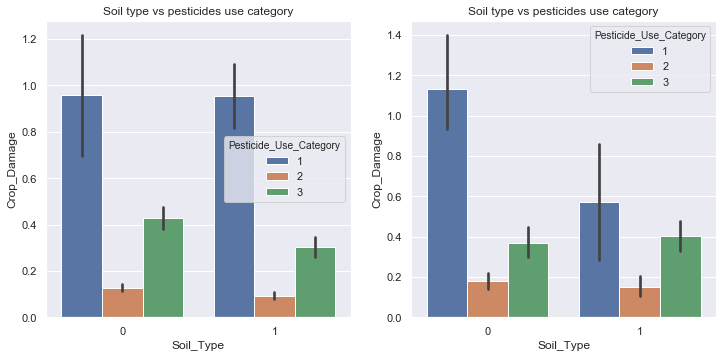

In [471]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
sns.barplot(x='Soil_Type',y='Crop_Damage',hue='Pesticide_Use_Category',data=train)
sns.set(style='darkgrid')
plt.title('Soil type vs pesticides use category')

plt.subplot(grid_rows,grid_cols,2)
sns.barplot(x=test['Soil_Type'],y=train['Crop_Damage'],hue=test['Pesticide_Use_Category'])
sns.set(style='darkgrid')
plt.title('Soil type vs pesticides use category')
plt.show()

crop damage
0-alive
1-Damage due to other cause
2-Damage due to pesticides
,pesticides use catogery
1-Never use
2-previously used
3-Currently using

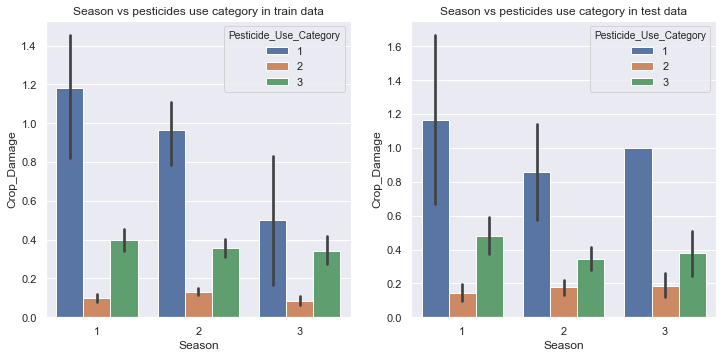

In [472]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
sns.barplot(x='Season',y='Crop_Damage',hue='Pesticide_Use_Category',data=train)
sns.set(style='darkgrid')
plt.title('Season vs pesticides use category in train data')

plt.subplot(grid_rows,grid_cols,2)
sns.barplot(x=test['Season'],y=train['Crop_Damage'],hue=test['Pesticide_Use_Category'])
sns.set(style='darkgrid')
plt.title('Season vs pesticides use category in test data')
plt.show()

crop damage
0-alive
1-Damage due to other cause
2-Damage due to pesticides
,pesticides use catogery
1-Never use
2-previously used
3-Currently using

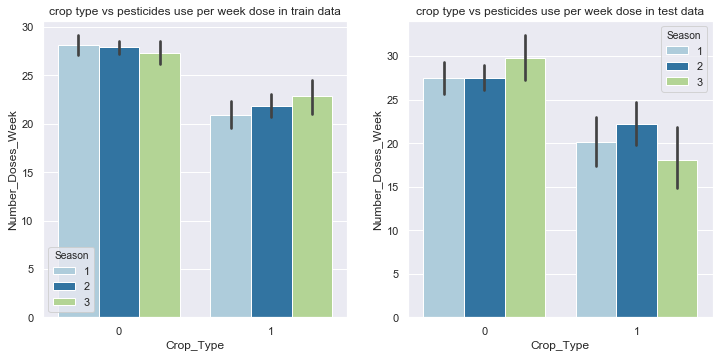

In [473]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
sns.barplot(x='Crop_Type',y='Number_Doses_Week',hue='Season',data=train,palette='Paired')
sns.set(style='darkgrid')
plt.title('crop type vs pesticides use per week dose in train data')

plt.subplot(grid_rows,grid_cols,2)
sns.barplot(x=test['Crop_Type'],y=test['Number_Doses_Week'],hue=test['Season'],palette='Paired')
sns.set(style='darkgrid')
plt.title('crop type vs pesticides use per week dose in test data')
plt.show()

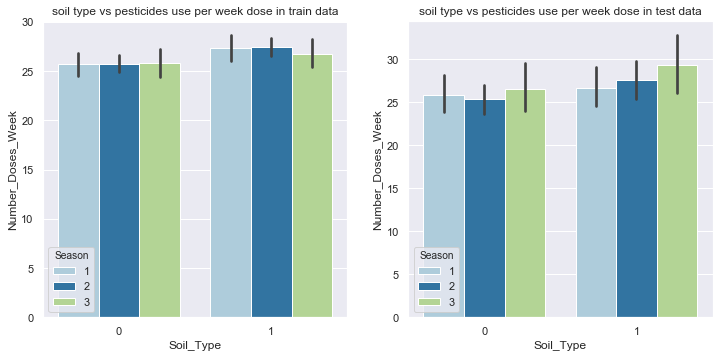

In [474]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
sns.barplot(x='Soil_Type',y='Number_Doses_Week',hue='Season',data=train,palette='Paired')
sns.set(style='darkgrid')
plt.title('soil type vs pesticides use per week dose in train data')

plt.subplot(grid_rows,grid_cols,2)
sns.barplot(x=test['Soil_Type'],y=test['Number_Doses_Week'],hue=test['Season'],palette='Paired')
sns.set(style='darkgrid')
plt.title('soil type vs pesticides use per week dose in test data')
plt.show()

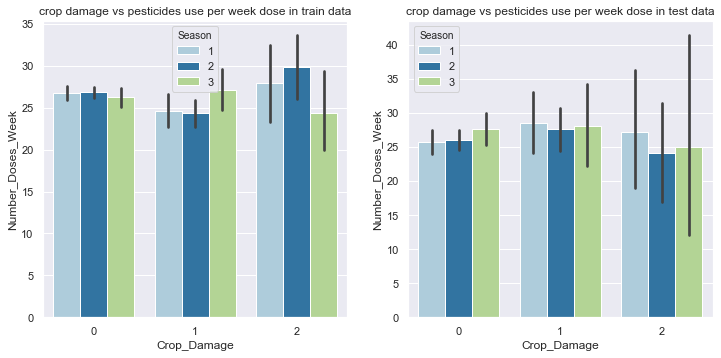

In [475]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
sns.barplot(x='Crop_Damage',y='Number_Doses_Week',hue='Season',data=train,palette='Paired')
sns.set(style='darkgrid')
plt.title('crop damage vs pesticides use per week dose in train data')

plt.subplot(grid_rows,grid_cols,2)
sns.barplot(x=train['Crop_Damage'],y=test['Number_Doses_Week'],hue=test['Season'],palette='Paired')
sns.set(style='darkgrid')
plt.title('crop damage vs pesticides use per week dose in test data')

plt.show()

crop damage
0-alive
1-Damage due to other cause
2-Damage due to pesticides

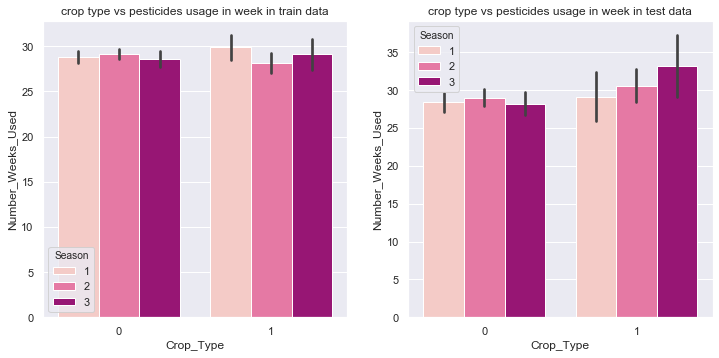

In [476]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
sns.barplot(x='Crop_Type',y='Number_Weeks_Used',hue='Season',data=train,palette='RdPu')
sns.set(style='darkgrid')
plt.title('crop type vs pesticides usage in week in train data')

plt.subplot(grid_rows,grid_cols,2)
sns.barplot(x='Crop_Type',y='Number_Weeks_Used',hue='Season',data=test,palette='RdPu')
sns.set(style='darkgrid')
plt.title('crop type vs pesticides usage in week in test data')
plt.show()

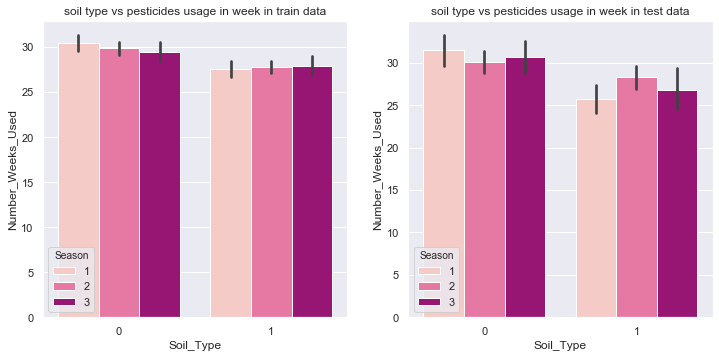

In [477]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
sns.barplot(x='Soil_Type',y='Number_Weeks_Used',hue='Season',data=train,palette='RdPu')
sns.set(style='darkgrid')
plt.title('soil type vs pesticides usage in week in train data')

plt.subplot(grid_rows,grid_cols,2)
sns.barplot(x='Soil_Type',y='Number_Weeks_Used',hue='Season',data=test,palette='RdPu')
sns.set(style='darkgrid')
plt.title('soil type vs pesticides usage in week in test data')
plt.show()

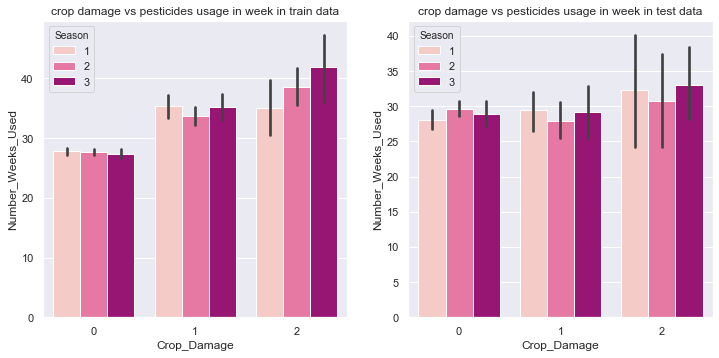

In [478]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
sns.barplot(x='Crop_Damage',y='Number_Weeks_Used',hue='Season',data=train,palette='RdPu')
sns.set(style='darkgrid')
plt.title('crop damage vs pesticides usage in week in train data')


plt.subplot(grid_rows,grid_cols,2)
sns.barplot(x=train['Crop_Damage'],y=test['Number_Weeks_Used'],hue=test['Season'],palette='RdPu')
sns.set(style='darkgrid')
plt.title('crop damage vs pesticides usage in week in test data')
plt.show()

crop damage
0-alive
1-Damage due to other cause
2-Damage due to pesticides

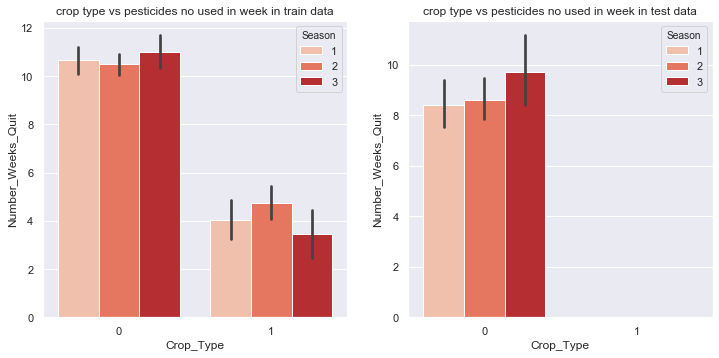

In [479]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
sns.barplot(x='Crop_Type',y='Number_Weeks_Quit',hue='Season',data=train,palette='Reds')
sns.set(style='darkgrid')
plt.title('crop type vs pesticides no used in week in train data')

plt.subplot(grid_rows,grid_cols,2)
sns.barplot(x='Crop_Type',y='Number_Weeks_Quit',hue='Season',data=test,palette='Reds')
sns.set(style='darkgrid')
plt.title('crop type vs pesticides no used in week in test data')
plt.show()

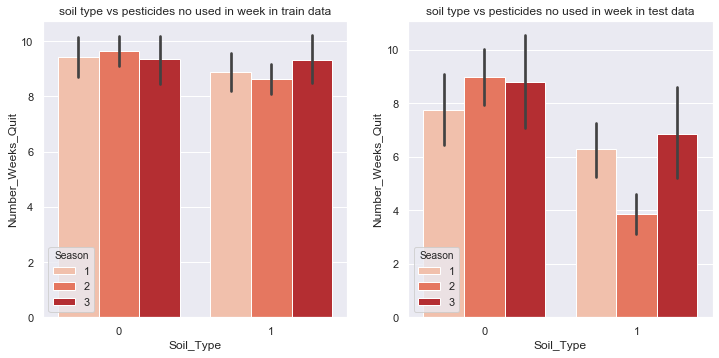

In [480]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
sns.barplot(x='Soil_Type',y='Number_Weeks_Quit',hue='Season',data=train,palette='Reds')
sns.set(style='darkgrid')
plt.title('soil type vs pesticides no used in week in train data')

plt.subplot(grid_rows,grid_cols,2)
sns.barplot(x='Soil_Type',y='Number_Weeks_Quit',hue='Season',data=test,palette='Reds')
sns.set(style='darkgrid')
plt.title('soil type vs pesticides no used in week in test data')
plt.show()

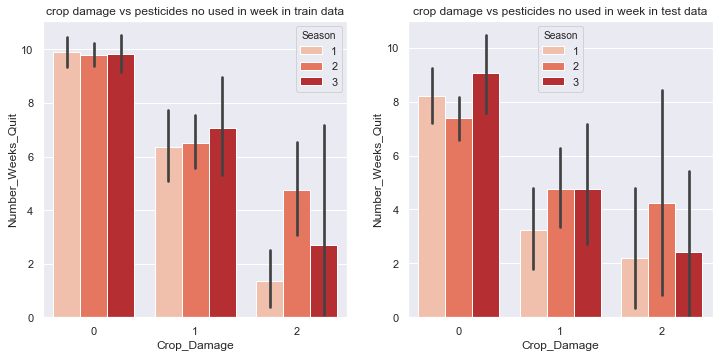

In [481]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
sns.barplot(x='Crop_Damage',y='Number_Weeks_Quit',hue='Season',data=train,palette='Reds')
sns.set(style='darkgrid')
plt.title('crop damage vs pesticides no used in week in train data')

plt.subplot(grid_rows,grid_cols,2)
sns.barplot(x=train['Crop_Damage'],y=test['Number_Weeks_Quit'],hue=test['Season'],data=train,palette='Reds')
sns.set(style='darkgrid')
plt.title('crop damage vs pesticides no used in week in test data')

plt.show()

crop damage
0-alive
1-Damage due to other cause
2-Damage due to pesticides

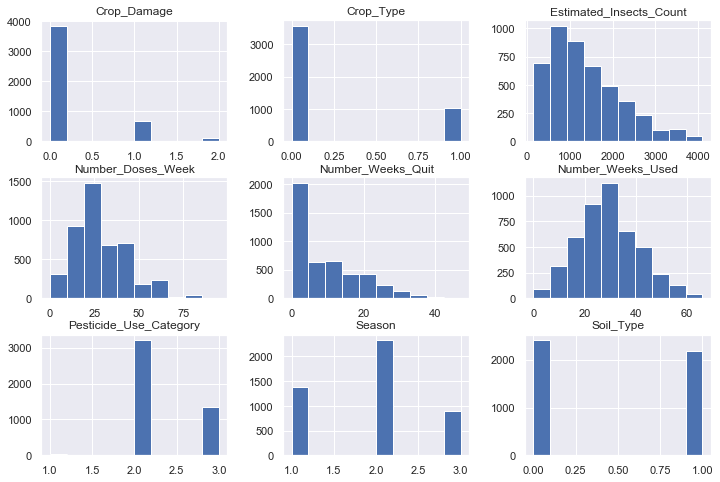

In [482]:
#SEE HISTPLOT OF ALL TRAIN DATA
train.hist(figsize=(12,8))
plt.show()

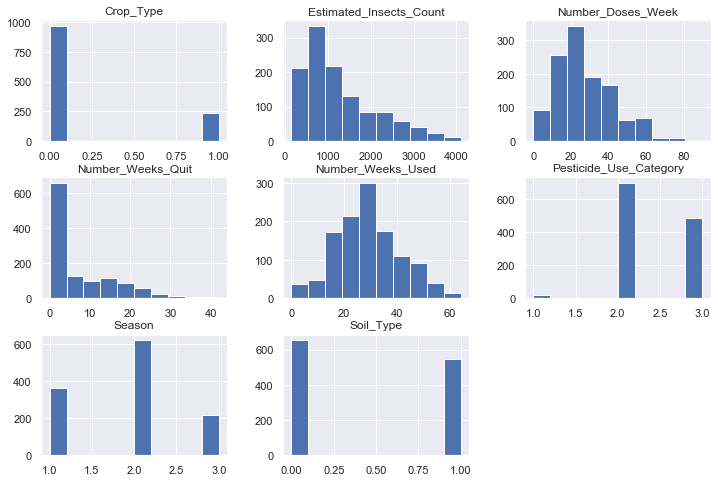

In [483]:
#SEE HISTPLOT OF ALL TEST DATA
test.hist(figsize=(12,8))
plt.show()

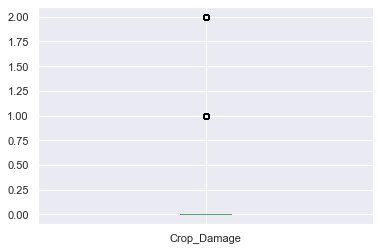

In [484]:
#check outliers in train data and test data
train['Crop_Damage'].plot.box()

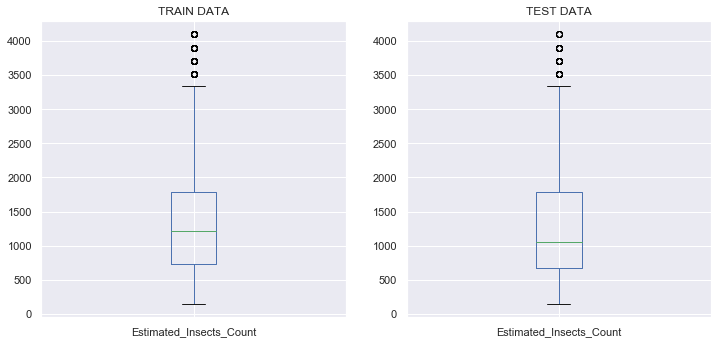

In [485]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
train['Estimated_Insects_Count'].plot.box()
plt.title('TRAIN DATA')

plt.subplot(grid_rows,grid_cols,2)
test['Estimated_Insects_Count'].plot.box()
plt.title('TEST DATA')

plt.show()

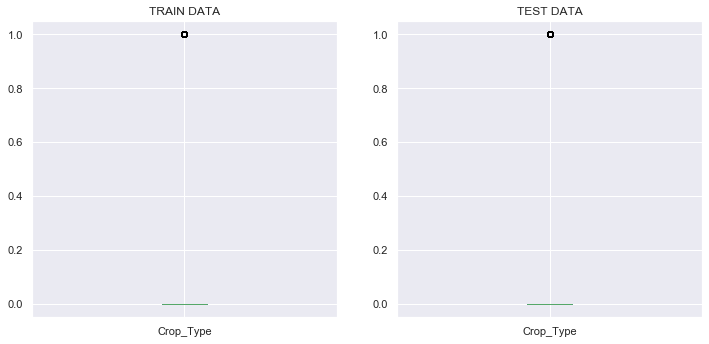

In [486]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
train['Crop_Type'].plot.box()
plt.title('TRAIN DATA')

plt.subplot(grid_rows,grid_cols,2)
test['Crop_Type'].plot.box()
plt.title('TEST DATA')

plt.show()

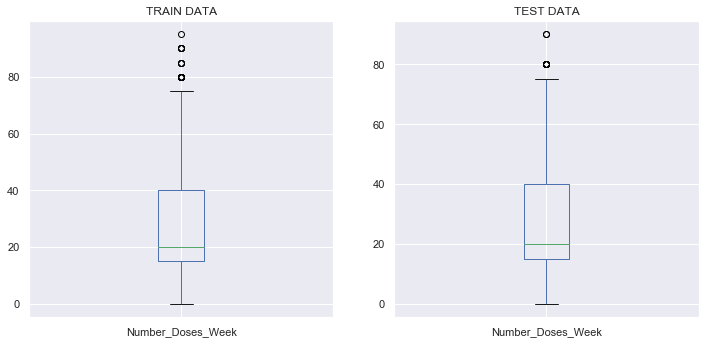

In [487]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
train['Number_Doses_Week'].plot.box()
plt.title('TRAIN DATA')

plt.subplot(grid_rows,grid_cols,2)
test['Number_Doses_Week'].plot.box()
plt.title('TEST DATA')

plt.show()

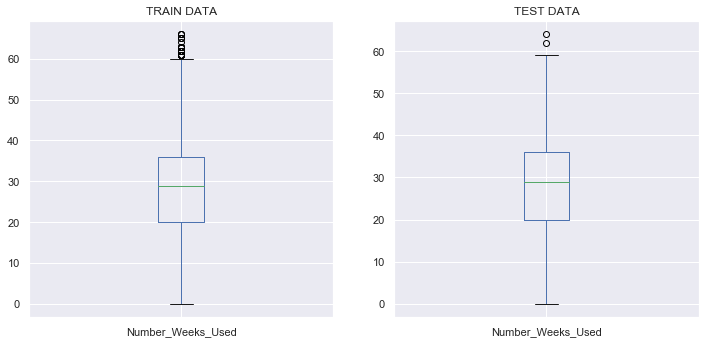

In [488]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
train['Number_Weeks_Used'].plot.box()
plt.title('TRAIN DATA')

plt.subplot(grid_rows,grid_cols,2)
test['Number_Weeks_Used'].plot.box()
plt.title('TEST DATA')

plt.show()

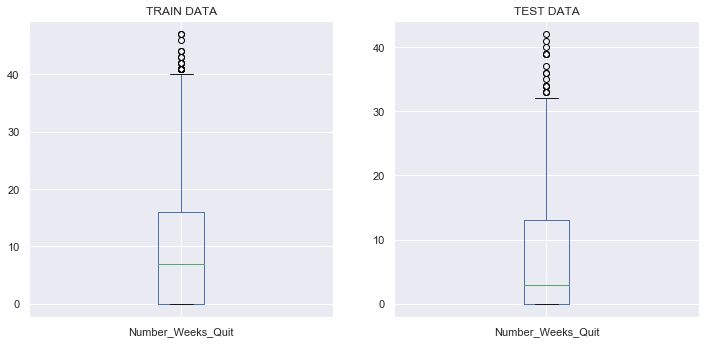

In [489]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
train['Number_Weeks_Quit'].plot.box()
plt.title('TRAIN DATA')

plt.subplot(grid_rows,grid_cols,2)
test['Number_Weeks_Quit'].plot.box()
plt.title('TEST DATA')

plt.show()

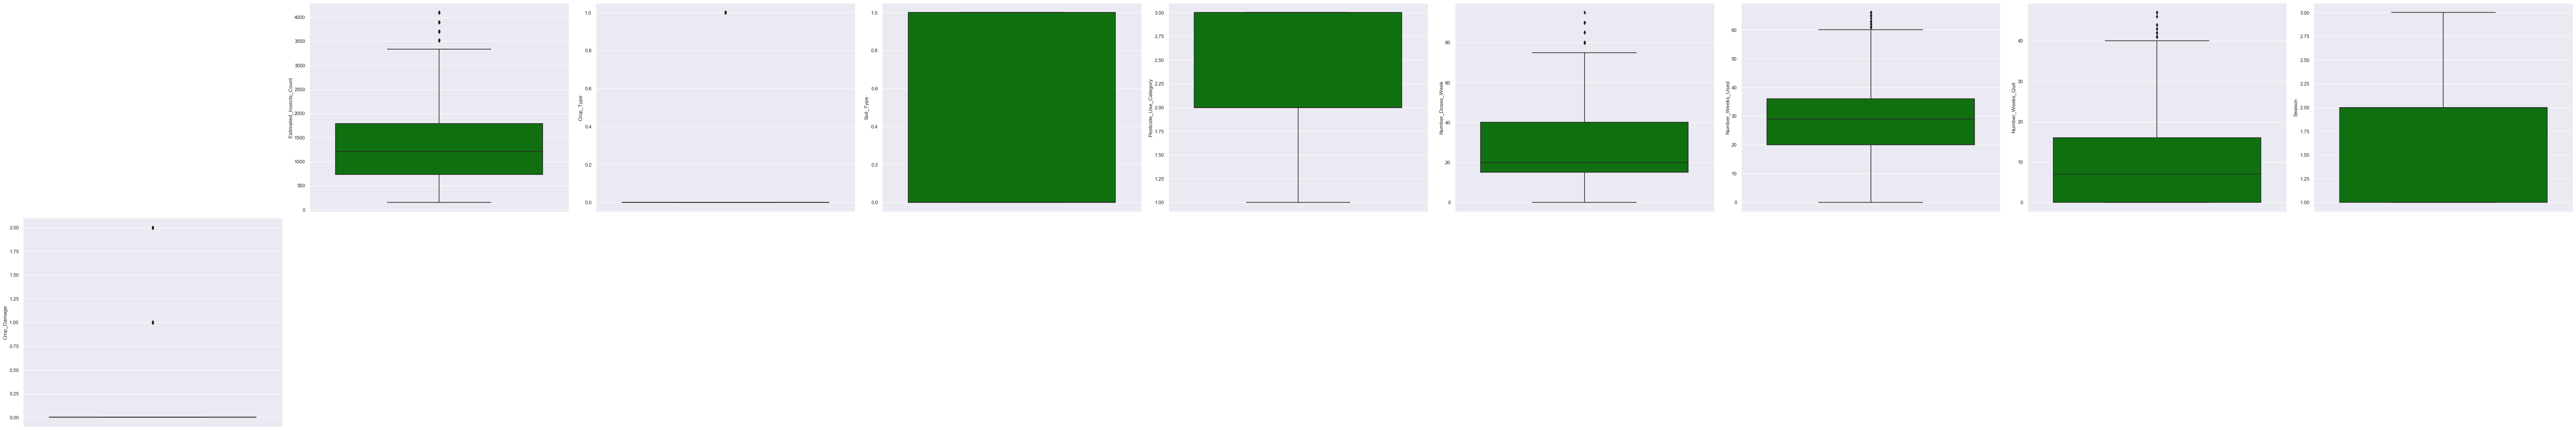

In [490]:
#see outliers at a time
collist=train.columns.values
ncol=9
nrows=20
plt.figure(figsize=(9*ncol,15*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(train[collist[i]],color='green',orient='v')
    plt.tight_layout()

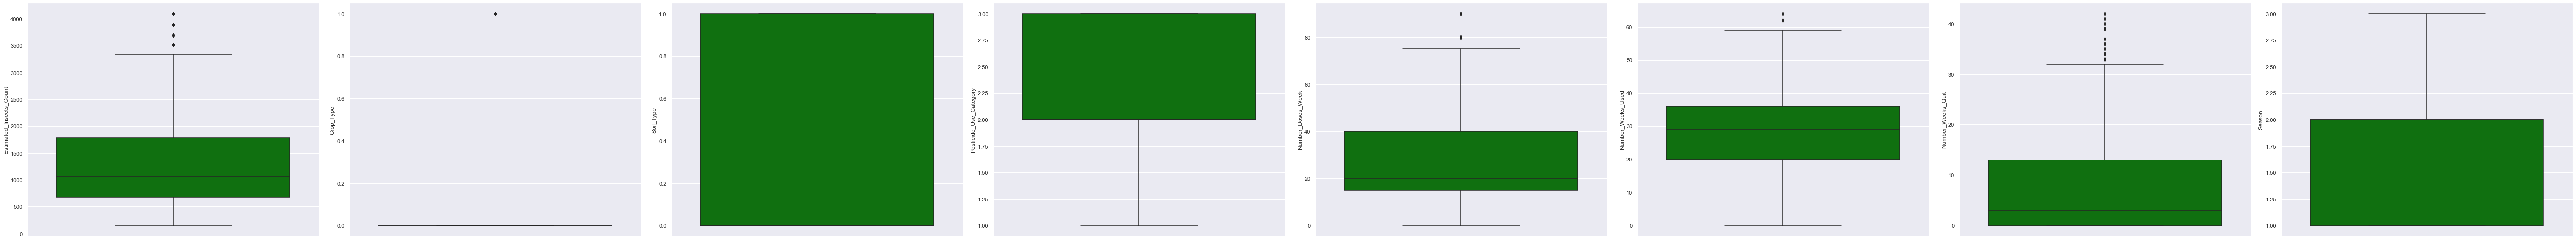

In [491]:
#see outliers at a time
collist=test.columns.values
ncol=9
nrows=20
plt.figure(figsize=(9*ncol,15*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(test[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [492]:
#check skewness of train data
train.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278448
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [493]:
test.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.221162
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

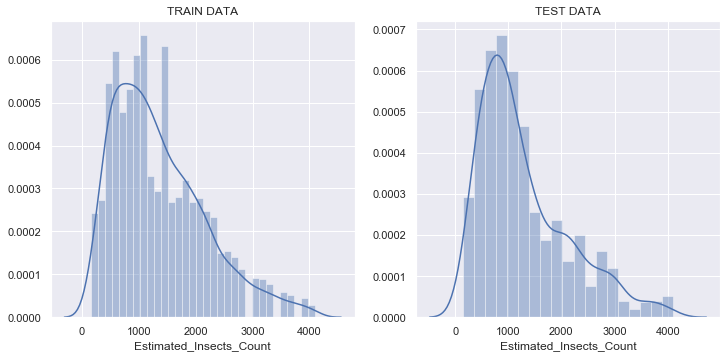

In [494]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
sns.distplot(train['Estimated_Insects_Count'])
plt.title('TRAIN DATA')

plt.subplot(grid_rows,grid_cols,2)
sns.distplot(test['Estimated_Insects_Count'])
plt.title('TEST DATA')

plt.show()

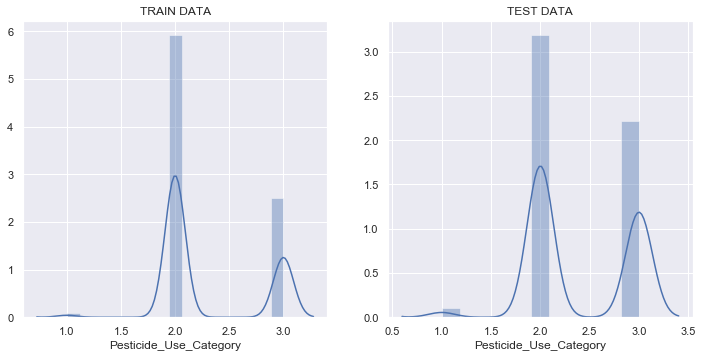

In [495]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
sns.distplot(train['Pesticide_Use_Category'])
plt.title('TRAIN DATA')

plt.subplot(grid_rows,grid_cols,2)
sns.distplot(test['Pesticide_Use_Category'])
plt.title('TEST DATA')

plt.show()

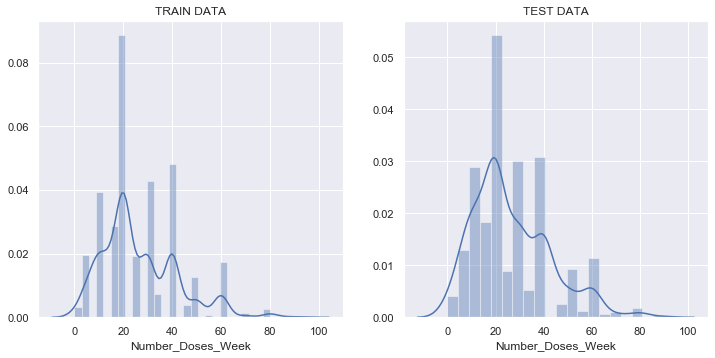

In [496]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
sns.distplot(train['Number_Doses_Week'])
plt.title('TRAIN DATA')

plt.subplot(grid_rows,grid_cols,2)
sns.distplot(test['Number_Doses_Week'])
plt.title('TEST DATA')

plt.show()

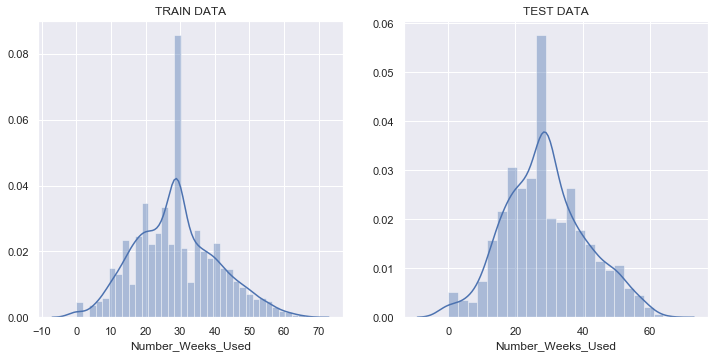

In [497]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
sns.distplot(train['Number_Weeks_Used'])
plt.title('TRAIN DATA')

plt.subplot(grid_rows,grid_cols,2)
sns.distplot(test['Number_Weeks_Used'])
plt.title('TEST DATA')

plt.show()

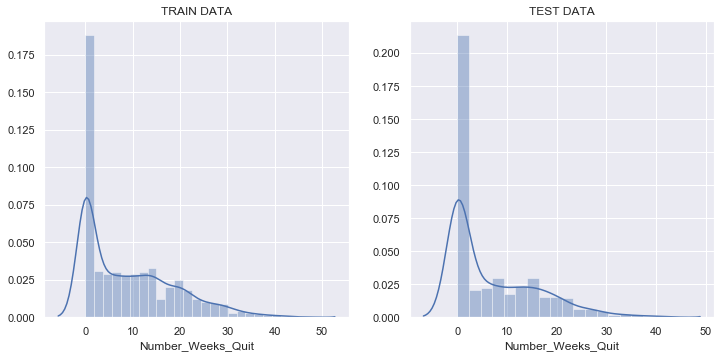

In [498]:
fig = plt.gcf()
fig.set_size_inches(12,12)
grid_rows = 2
grid_cols = 2

plt.subplot(grid_rows,grid_cols,1)
sns.distplot(train['Number_Weeks_Quit'])
plt.title('TRAIN DATA')

plt.subplot(grid_rows,grid_cols,2)
sns.distplot(test['Number_Weeks_Quit'])
plt.title('TEST DATA')

plt.show()

In [499]:
#We can drop ID in both train and test data
train=train.drop(columns=['ID'])
test=test.drop(columns=['ID'])

In [500]:
train.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [501]:
test.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

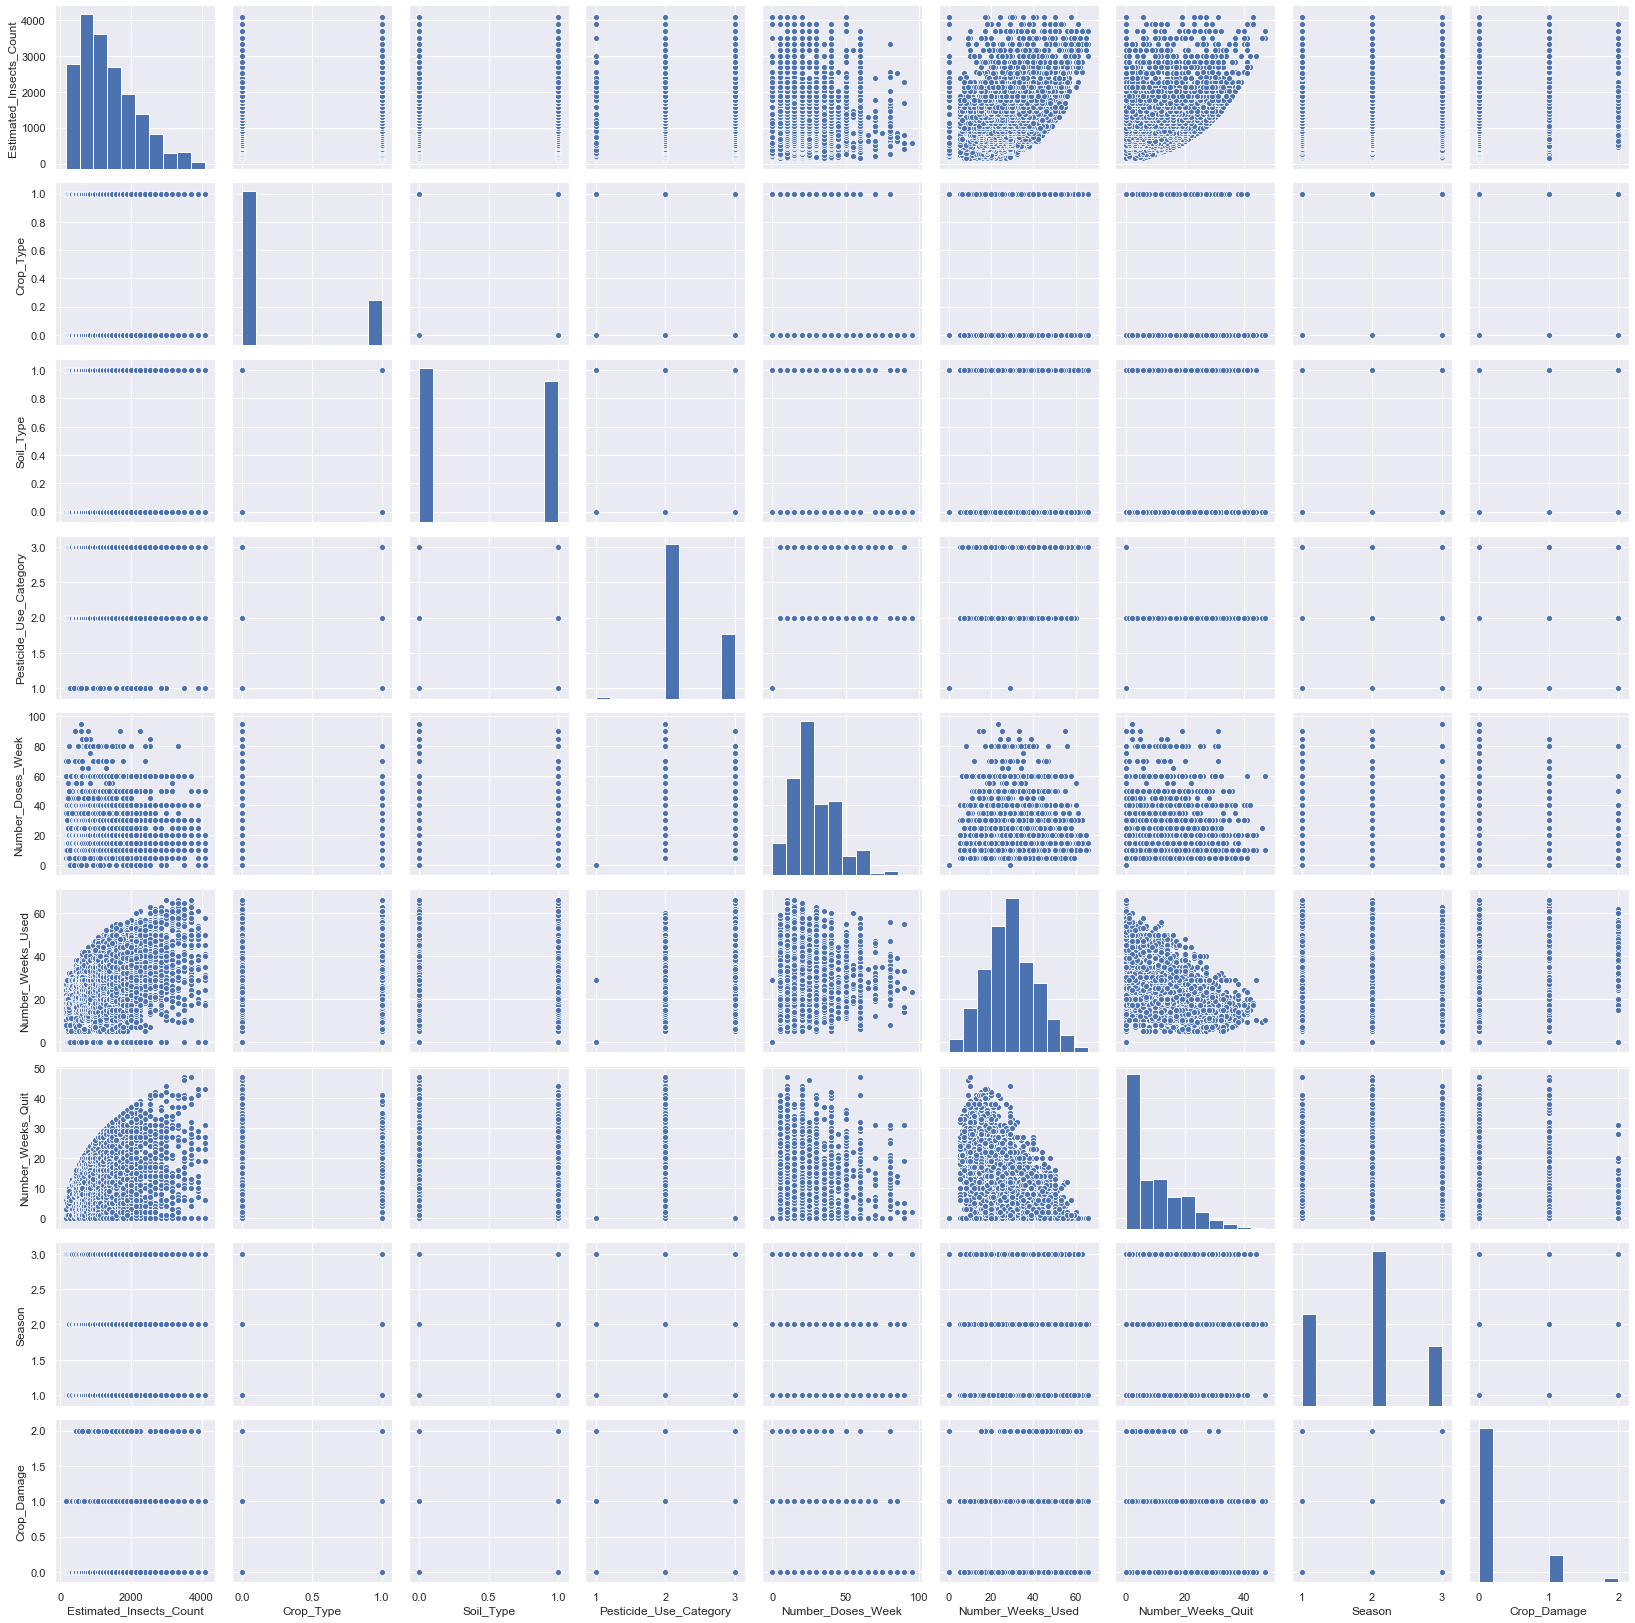

In [502]:
#pairplot for train data
sns.pairplot(train)

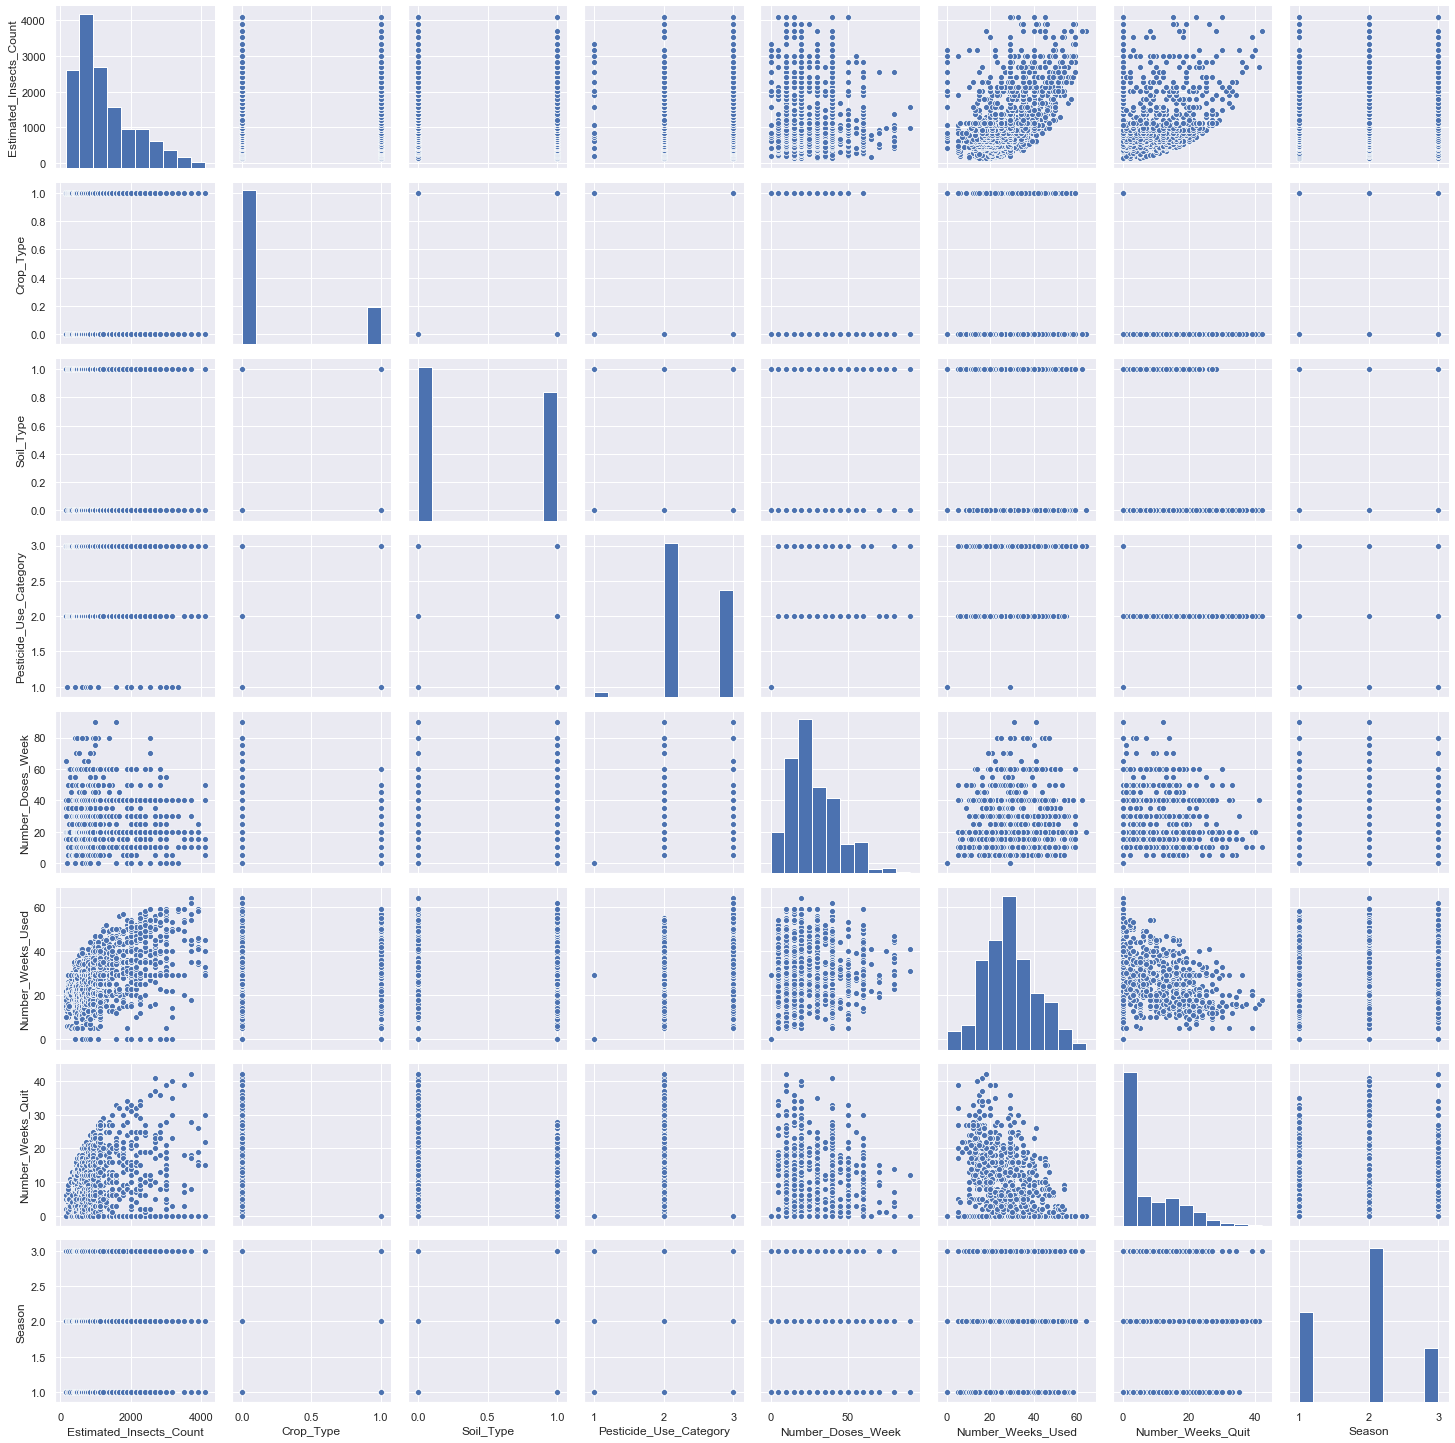

In [503]:
#pairplot for test data
sns.pairplot(test)

In [504]:
#remove outiers in train data
from scipy.stats import zscore
z=np.abs(zscore(train))
z

array([[1.44286807, 1.85681868, 0.95429408, ..., 0.94782668, 1.28702725,
        0.42765624],
       [1.41708065, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       [1.35813798, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       ...,
       [1.11008649, 0.53855555, 1.04789501, ..., 1.83218282, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 1.52329287, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 0.80254967, 0.15207762,
        0.42765624]])

In [505]:
Threshold=3
print(np.where(z<3))

(array([   0,    0,    0, ..., 4598, 4598, 4598], dtype=int64), array([0, 1, 2, ..., 6, 7, 8], dtype=int64))


In [506]:
z[0][0]

1.4428680702892576

In [507]:
df=train[(z<3).all(axis=1)]
df.shape

(4370, 9)

In [508]:
print(df.shape,train.shape)

(4370, 9) (4599, 9)


In [509]:
train=df

In [510]:
train.shape

(4370, 9)

229 outliers are removed

In [511]:
#split the train data
x=train.iloc[:,:-1]
x.head()

Estimated_Insects_Count  Crop_Type  Soil_Type  Pesticide_Use_Category  \
0                      188          1          0                       1   
1                      209          1          0                       1   
2                      257          1          0                       1   
3                      257          1          1                       1   
4                      342          1          0                       1   

   Number_Doses_Week  Number_Weeks_Used  Number_Weeks_Quit  Season  
0                  0                0.0                  0       1  
1                  0                0.0                  0       2  
2                  0                0.0                  0       2  
3                  0                0.0                  0       2  
4                  0                0.0                  0       2

In [512]:
y=train.iloc[:,8:]
y.head()

Crop_Damage
0            0
1            1
2            1
3            1
4            1

In [513]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.48004754,  1.8489469 , -0.9609451 , ..., -2.4457498 ,
        -0.97238331, -1.28855889],
       [-1.45262046,  1.8489469 , -0.9609451 , ..., -2.4457498 ,
        -0.97238331,  0.14755495],
       [-1.38993   ,  1.8489469 , -0.9609451 , ..., -2.4457498 ,
        -0.97238331,  0.14755495],
       ...,
       [ 1.23523315, -0.54084841,  1.04064217, ..., -1.84752885,
         1.89117949,  0.14755495],
       [ 1.23523315, -0.54084841,  1.04064217, ..., -0.73654708,
         1.57300584,  0.14755495],
       [ 1.23523315, -0.54084841,  1.04064217, ...,  0.37443469,
         0.83060067,  0.14755495]])

In [514]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=9,test_size=0.3,stratify=y)

In [515]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [516]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(3059, 8) (1311, 8)
(3059, 1) (1311, 1)


In [517]:
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier(random_state=9)
sv=SVC()
lr=LogisticRegression()
gn=GaussianNB()

In [518]:
models = []
models.append(('KNneighborsClassifier',knn))
models.append(('DecisionTreeClassifier',dt))
models.append(('SVC',sv))
models.append(('LogisticRegression',lr))
models.append(('GaussianNB',gn))

*************************** KNneighborsClassifier ***************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


AccuracyScore= 0.8413424866514111


cross_val_score= 0.7983981693363844


roc_auc_score= 0.5769869861483468


classification_report
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1119
           1       0.41      0.20      0.27       192

    accuracy                           0.84      1311
   macro avg       0.64      0.58      0.59      1311
weighted avg       0.81      0.84      0.82      1311



[[1064   55]
 [ 153   39]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*************************** DecisionTreeClassifier ***************************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None,

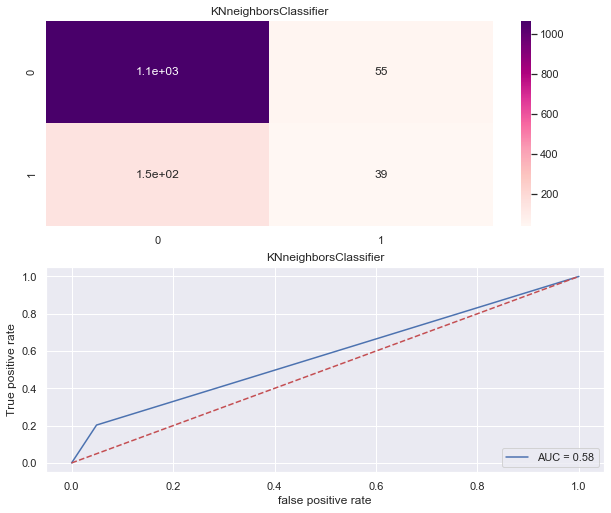

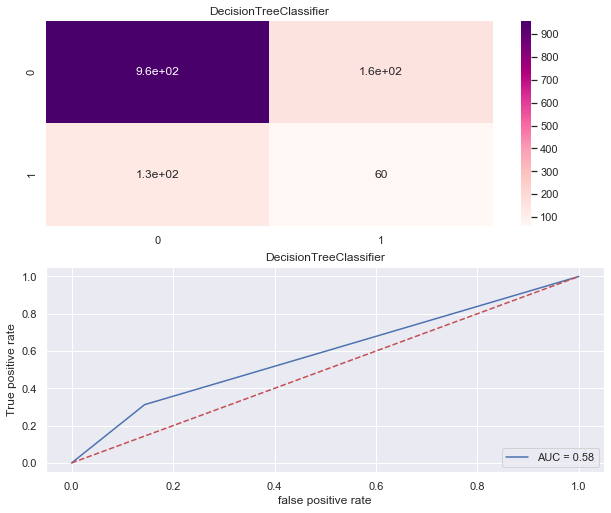

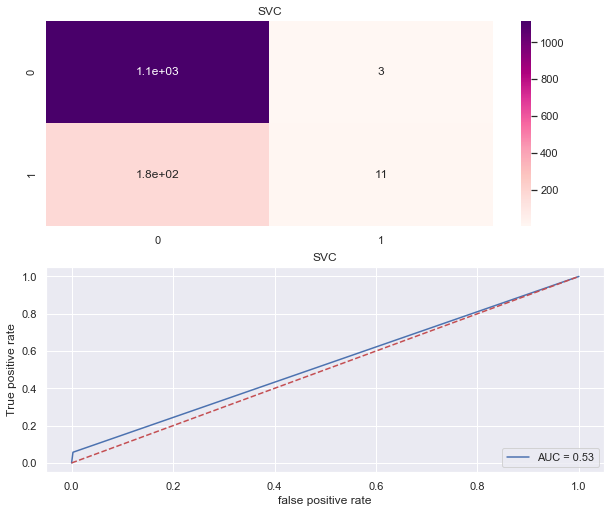

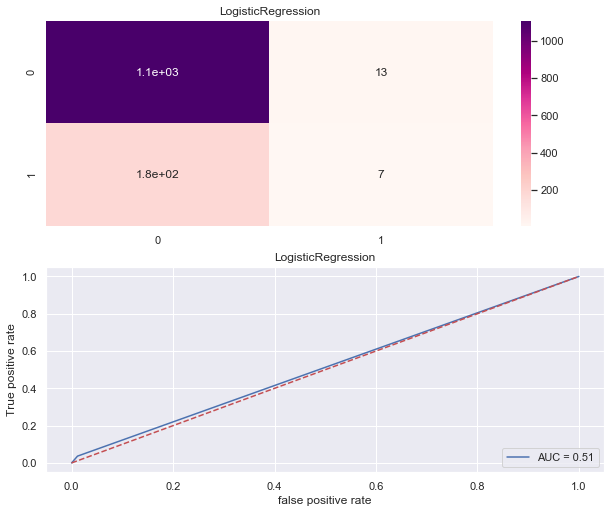

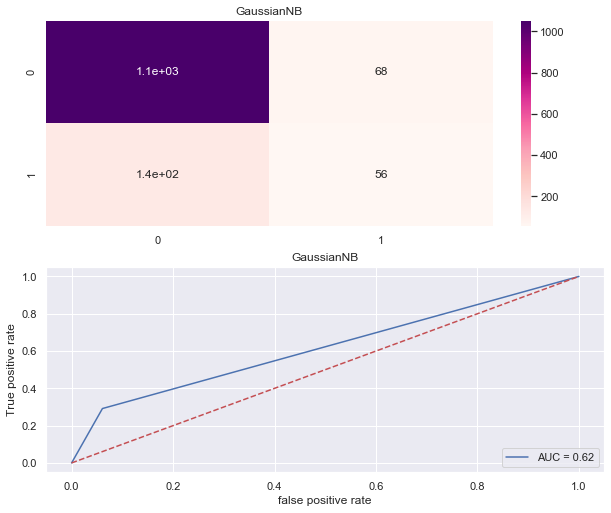

In [519]:
Model = []
score = []
cvs = []
rocscore=[]
for name,model in models:
    print('***************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('AccuracyScore=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True,cmap='RdPu'))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('false positive rate')
    print('\n\n')

In [520]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cvs,'roc_auc_curve':rocscore})
result

Model  Accuracy_score  Cross_val_score  roc_auc_curve
0   KNneighborsClassifier       84.134249        79.839817      57.698699
1  DecisionTreeClassifier       77.650648        71.487414      58.431077
2                     SVC       85.964912        83.295195      52.730535
3      LogisticRegression       84.897025        83.844394      51.242041
4              GaussianNB       84.439359        77.780320      61.544906

here i choose svc it has higher in accuracy score and cross val score where has roc auc curve is good in gaussianNB

In [521]:
#For best score using gridsearchcv
from sklearn.model_selection import GridSearchCV

In [522]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
grid_param={
    'criterion': ['gini','entropy']
}
gd_sr=GridSearchCV(estimator=dtc,
                   param_grid=grid_param,
                  scoring='accuracy',
                  cv=10)
gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.7208237986270023


In [523]:
sv=SVC()
grid_param={
    'kernel': ['rbf','linear','poly']
}
gd_sr=GridSearchCV(estimator=sv,
                   param_grid=grid_param,
                  scoring='accuracy',
                  cv=10)
gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'kernel': 'linear'}
0.8537757437070939


In [524]:
from sklearn.svm import SVC
sv=SVC

In [525]:
#bagging classifier
from sklearn.ensemble import RandomForestClassifier

rc= RandomForestClassifier(n_estimators=250,random_state=50)

rc.fit(x_train,y_train)
predrc=rc.predict(x_test)
print(accuracy_score(y_test,predrc))

0.8581235697940504


In [526]:
#boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=250,random_state=50)
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
print(accuracy_score(y_test,gb_pred))

0.8535469107551488


In [527]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=250,random_state=50)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))

0.8504958047292144


In [528]:
#PREDICT THE VALUES
pred=lr.predict(x_test)
print('predicted result:',pred)
print('actual:',y_test)

predicted result: [0 0 0 ... 0 0 0]
actual:       Crop_Damage
2052            0
3350            0
1895            0
4583            0
4107            0
...           ...
4242            1
3165            0
4228            0
962             0
784             0

[1311 rows x 1 columns]


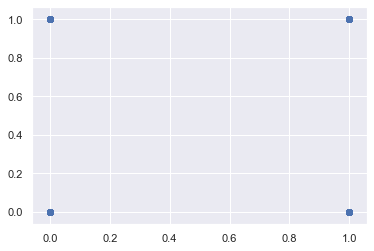

In [529]:
print(plt.scatter(x=y_test,y=pre))
plt.show()

In [530]:
#predict the test data 
test['Crop_Damage_Predicted']=lr.predict(test)

In [531]:
test

Estimated_Insects_Count  Crop_Type  Soil_Type  Pesticide_Use_Category  \
0                         188          1          1                       1   
1                         410          1          1                       1   
2                         626          1          0                       1   
3                         731          1          0                       1   
4                         789          0          0                       1   
...                       ...        ...        ...                     ...   
1194                     1132          0          1                       2   
1195                     1132          0          1                       2   
1196                     1132          0          1                       2   
1197                     1212          0          1                       2   
1198                     1212          0          1                       2   

      Number_Doses_Week  Number_Weeks_Used  Number_Weeks_Quit  Season  \
0                     0               29.0                  0       2   
1                     0                0.0                  0       2   
2                     0                0.0                  0       2   
3                     0                0.0                  0       2   
4                     0                0.0                  0       1   
...                 ...                ...                ...     ...   
1194                 40               34.0                  7       3   
1195                 40               25.0                  3       1   
1196                 20               13.0                 23       1   
1197                 10               35.0                  5       1   
1198                 15               29.0                 20       3   

      Crop_Damage_Predicted  
0                         1  
1                         1  
2                         1  
3                         1  
4                         1  
...                     ...  
1194                      1  
1195                      1  
1196                      1  
1197                      1  
1198                      1  

[1199 rows x 9 columns]

crop damage 0-alive 1-Damage due to other cause 2-Damage due to pesticides

In [532]:
#saving the file
from joblib import dump,load
dump(df,'customer_churn_project.joblib')

['customer_churn_project.joblib']